# Cartes basée sur Melotte pour la comparaison

# Analyse evolution entre Melotte et Berney

Skipping field own_col_de: unsupported OGR type: 5
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/3645719655.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  inter['area_inter'] = inter.geometry.area
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/3645719655.py:47: UserWarning: `keep_geom_type=True` in overlay resulted in 99 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/3645719655.py:78: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/kd/rc_r8j55289115b7qptd

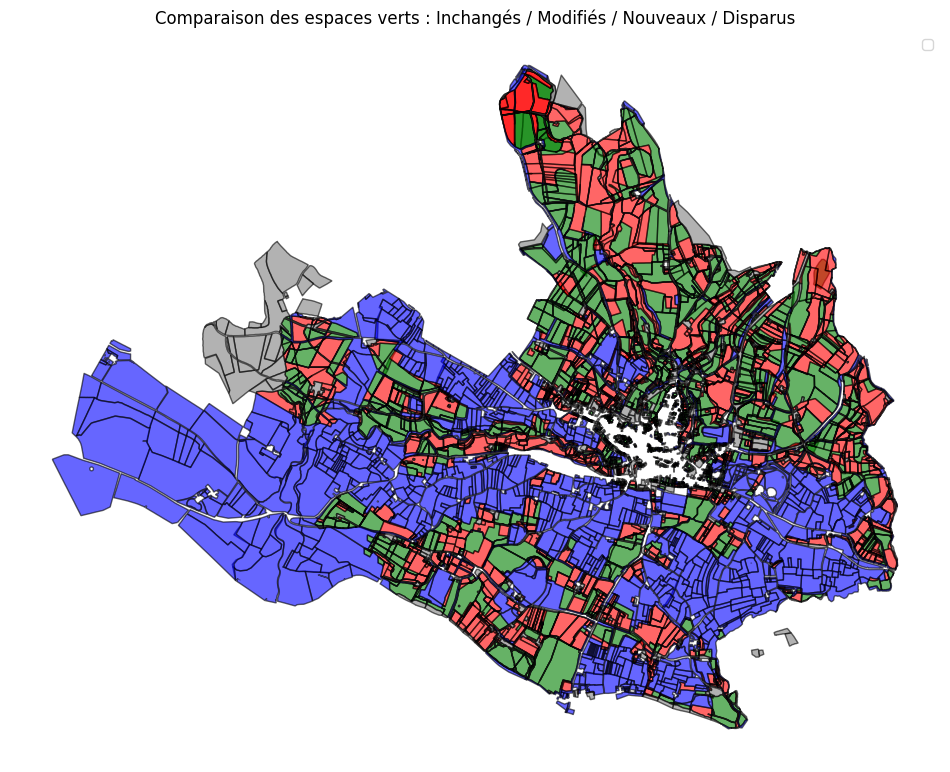

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


# 1. Charger les deux fichiers GeoJSON
gdf_old = gpd.read_file("Melotte-1721.geojson")
gdf_new = gpd.read_file("Berney_espaces_verts_macro.geojson")

# 2. Nettoyer et buffer pour éviter erreurs topologiques
gdf_old['geometry'] = gdf_old.geometry.buffer(0)
gdf_new['geometry'] = gdf_new.geometry.buffer(0)

# 3. Ajouter un identifiant unique
gdf_old = gdf_old.reset_index().rename(columns={'index': 'id_old'})
gdf_new = gdf_new.reset_index().rename(columns={'index': 'id_new'})

# 4. Harmoniser le système de coordonnées
if gdf_old.crs != gdf_new.crs:
    gdf_new = gdf_new.to_crs(gdf_old.crs)

# 5. Calcul des intersections avec découpe
inter = gpd.overlay(gdf_old, gdf_new, how='intersection')

# 6. Ajouter les champs de macro_ev et surfaces d'origine
inter = inter.merge(
    gdf_old[['id_old', 'macro_ev', 'area_m2']],
    on='id_old', how='left'
).rename(columns={'macro_ev': 'macro_ev_old', 'area_m2': 'area_old'})

inter = inter.merge(
    gdf_new[['id_new', 'macro_ev', 'area_m2']],
    on='id_new', how='left'
).rename(columns={'macro_ev': 'macro_ev_new', 'area_m2': 'area_new'})

# 7. Calculer la surface d'intersection
inter['area_inter'] = inter.geometry.area
inter['pct_old'] = inter['area_inter'] / inter['area_old']
inter['pct_new'] = inter['area_inter'] / inter['area_new']

# 8. Ajouter une colonne "changement"
inter["changement"] = inter.apply(
    lambda row: "inchangé" if row["macro_ev_old"] == row["macro_ev_new"] else "modifié",
    axis=1
)

# 9. Détecter les zones "disparues" et "nouvelles"
disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
disparus["changement"] = "disparu"

nouveaux = gpd.overlay(gdf_new, gdf_old, how='difference')
nouveaux["changement"] = "nouveau"

# 10. Fusion finale
gdf_final = pd.concat([inter, disparus, nouveaux], ignore_index=True)
gdf_final = gpd.GeoDataFrame(gdf_final, geometry='geometry', crs=gdf_old.crs)

# 11. Sauvegarde finale
gdf_final.to_file("evolution_Melotte_Berney.geojson", driver='GeoJSON')

# 12. Affichage
fig, ax = plt.subplots(figsize=(12, 12))

colors = {
    "inchangé": "green",
    "modifié": "red",
    "nouveau": "blue",
    "disparu": "gray"
}

# On trace chaque catégorie séparément
for cat, color in colors.items():
    subset = gdf_final[gdf_final["changement"] == cat]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='black', alpha=0.6, label=cat.capitalize())
    else:
        print(f"Aucune zone '{cat}' à afficher.")

plt.legend()
plt.title("Comparaison des espaces verts : Inchangés / Modifiés / Nouveaux / Disparus")
plt.axis('off')
plt.show()


# Analyse evolution entre Melotte et rénové

/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/1098868078.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  inter['area_inter'] = inter.geometry.area
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/1098868078.py:47: UserWarning: `keep_geom_type=True` in overlay resulted in 46 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/1098868078.py:78: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/1098868078.py:78: User

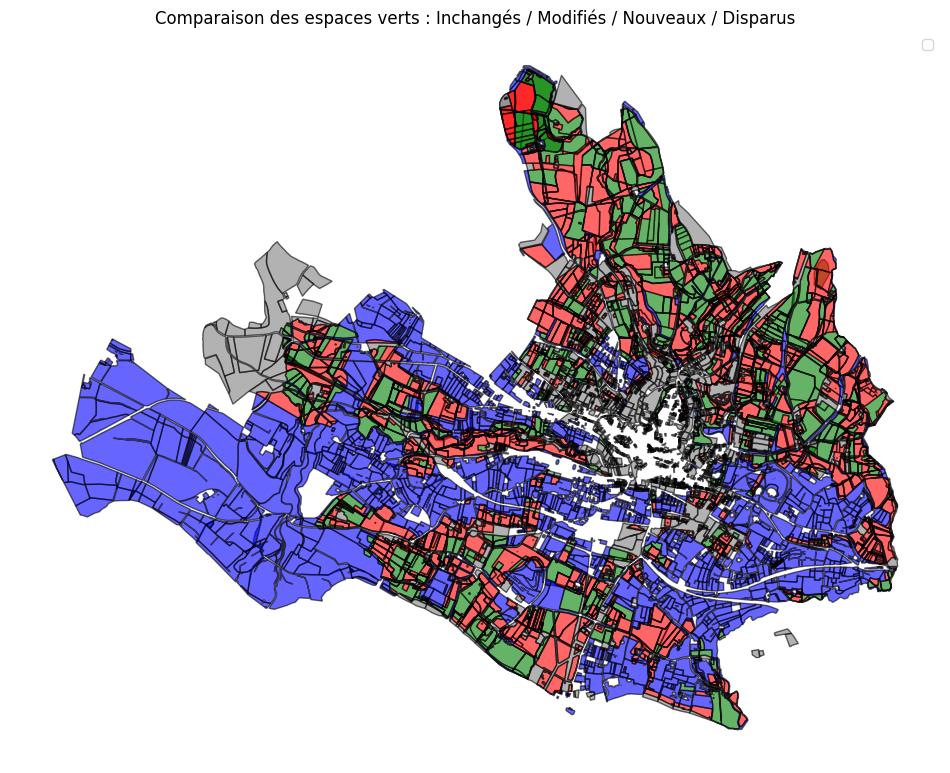

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 1. Charger les deux fichiers GeoJSON
gdf_old = gpd.read_file("Melotte-1721.geojson")
gdf_new = gpd.read_file("espaces_verts_macro.geojson")

# 2. Nettoyer et buffer pour éviter erreurs topologiques
gdf_old['geometry'] = gdf_old.geometry.buffer(0)
gdf_new['geometry'] = gdf_new.geometry.buffer(0)

# 3. Ajouter un identifiant unique
gdf_old = gdf_old.reset_index().rename(columns={'index': 'id_old'})
gdf_new = gdf_new.reset_index().rename(columns={'index': 'id_new'})

# 4. Harmoniser le système de coordonnées
if gdf_old.crs != gdf_new.crs:
    gdf_new = gdf_new.to_crs(gdf_old.crs)

# 5. Calcul des intersections avec découpe
inter = gpd.overlay(gdf_old, gdf_new, how='intersection')

# 6. Ajouter les champs de macro_ev et surfaces d'origine
inter = inter.merge(
    gdf_old[['id_old', 'macro_ev', 'area_m2']],
    on='id_old', how='left'
).rename(columns={'macro_ev': 'macro_ev_old', 'area_m2': 'area_old'})

inter = inter.merge(
    gdf_new[['id_new', 'macro_ev', 'area_m2']],
    on='id_new', how='left'
).rename(columns={'macro_ev': 'macro_ev_new', 'area_m2': 'area_new'})

# 7. Calculer la surface d'intersection
inter['area_inter'] = inter.geometry.area
inter['pct_old'] = inter['area_inter'] / inter['area_old']
inter['pct_new'] = inter['area_inter'] / inter['area_new']

# 8. Ajouter une colonne "changement"
inter["changement"] = inter.apply(
    lambda row: "inchangé" if row["macro_ev_old"] == row["macro_ev_new"] else "modifié",
    axis=1
)

# 9. Détecter les zones "disparues" et "nouvelles"
disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
disparus["changement"] = "disparu"

nouveaux = gpd.overlay(gdf_new, gdf_old, how='difference')
nouveaux["changement"] = "nouveau"

# 10. Fusion finale
gdf_final = pd.concat([inter, disparus, nouveaux], ignore_index=True)
gdf_final = gpd.GeoDataFrame(gdf_final, geometry='geometry', crs=gdf_old.crs)

# 11. Sauvegarde finale
gdf_final.to_file("evolution_Melotte_renove.geojson", driver='GeoJSON')

# 12. Affichage
fig, ax = plt.subplots(figsize=(12, 12))

colors = {
    "inchangé": "green",
    "modifié": "red",
    "nouveau": "blue",
    "disparu": "gray"
}

# On trace chaque catégorie séparément
for cat, color in colors.items():
    subset = gdf_final[gdf_final["changement"] == cat]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='black', alpha=0.6, label=cat.capitalize())
    else:
        print(f"Aucune zone '{cat}' à afficher.")

plt.legend()
plt.title("Comparaison des espaces verts : Inchangés / Modifiés / Nouveaux / Disparus")
plt.axis('off')
plt.show()


# Analyse evolution entre Melotte et 2024

/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/4269315715.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  inter['area_inter'] = inter.geometry.area
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/4269315715.py:47: UserWarning: `keep_geom_type=True` in overlay resulted in 46 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/4269315715.py:78: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/4269315715.py:78: User

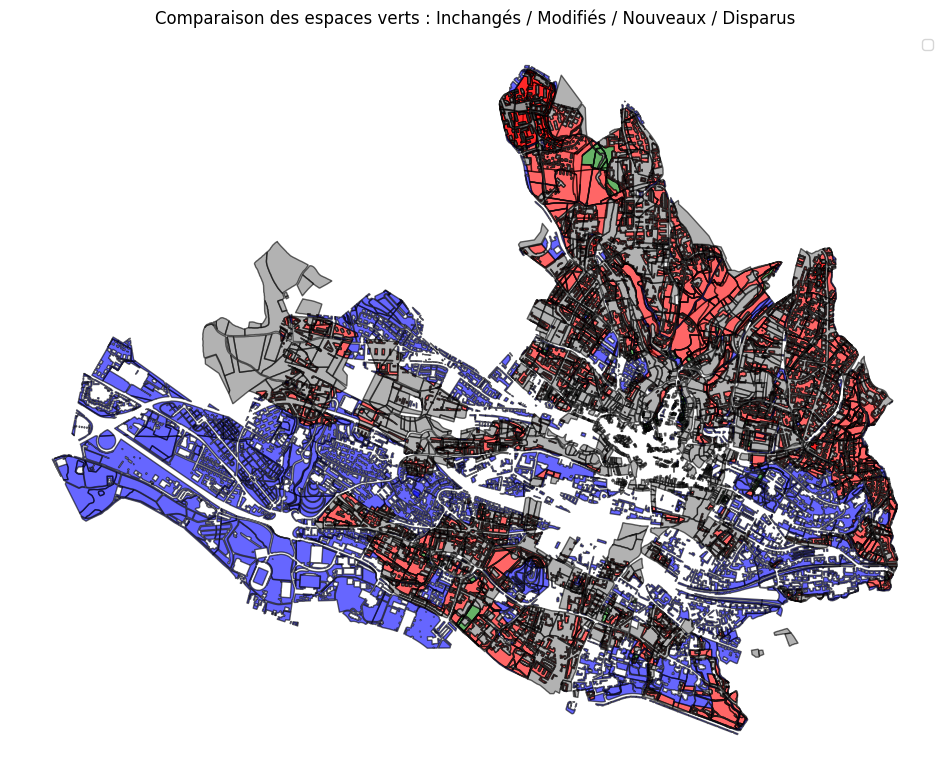

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 1. Charger les deux fichiers GeoJSON
gdf_old = gpd.read_file("Melotte-1721.geojson")
gdf_new = gpd.read_file("2024_espaces_verts_macro.geojson")

# 2. Nettoyer et buffer pour éviter erreurs topologiques
gdf_old['geometry'] = gdf_old.geometry.buffer(0)
gdf_new['geometry'] = gdf_new.geometry.buffer(0)

# 3. Ajouter un identifiant unique
gdf_old = gdf_old.reset_index().rename(columns={'index': 'id_old'})
gdf_new = gdf_new.reset_index().rename(columns={'index': 'id_new'})

# 4. Harmoniser le système de coordonnées
if gdf_old.crs != gdf_new.crs:
    gdf_new = gdf_new.to_crs(gdf_old.crs)

# 5. Calcul des intersections avec découpe
inter = gpd.overlay(gdf_old, gdf_new, how='intersection')

# 6. Ajouter les champs de macro_ev et surfaces d'origine
inter = inter.merge(
    gdf_old[['id_old', 'macro_ev', 'area_m2']],
    on='id_old', how='left'
).rename(columns={'macro_ev': 'macro_ev_old', 'area_m2': 'area_old'})

inter = inter.merge(
    gdf_new[['id_new', 'macro_ev', 'area_m2']],
    on='id_new', how='left'
).rename(columns={'macro_ev': 'macro_ev_new', 'area_m2': 'area_new'})

# 7. Calculer la surface d'intersection
inter['area_inter'] = inter.geometry.area
inter['pct_old'] = inter['area_inter'] / inter['area_old']
inter['pct_new'] = inter['area_inter'] / inter['area_new']

# 8. Ajouter une colonne "changement"
inter["changement"] = inter.apply(
    lambda row: "inchangé" if row["macro_ev_old"] == row["macro_ev_new"] else "modifié",
    axis=1
)

# 9. Détecter les zones "disparues" et "nouvelles"
disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
disparus["changement"] = "disparu"

nouveaux = gpd.overlay(gdf_new, gdf_old, how='difference')
nouveaux["changement"] = "nouveau"

# 10. Fusion finale
gdf_final = pd.concat([inter, disparus, nouveaux], ignore_index=True)
gdf_final = gpd.GeoDataFrame(gdf_final, geometry='geometry', crs=gdf_old.crs)

# 11. Sauvegarde finale
gdf_final.to_file("evolution_Melotte_actuel.geojson", driver='GeoJSON')

# 12. Affichage
fig, ax = plt.subplots(figsize=(12, 12))

colors = {
    "inchangé": "green",
    "modifié": "red",
    "nouveau": "blue",
    "disparu": "gray"
}

# On trace chaque catégorie séparément
for cat, color in colors.items():
    subset = gdf_final[gdf_final["changement"] == cat]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='black', alpha=0.6, label=cat.capitalize())
    else:
        print(f"Aucune zone '{cat}' à afficher.")

plt.legend()
plt.title("Comparaison des espaces verts : Inchangés / Modifiés / Nouveaux / Disparus")
plt.axis('off')
plt.show()


# Cartes basée sur les autres cadastres

# Analyse evolution entre Berney et rénové

Skipping field own_col_de: unsupported OGR type: 5
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_13070/1397400699.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  inter['area_inter'] = inter.geometry.area
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_13070/1397400699.py:47: UserWarning: `keep_geom_type=True` in overlay resulted in 150 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_13070/1397400699.py:50: UserWarning: `keep_geom_type=True` in overlay resulted in 152 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  nouveaux = gpd.overlay(gdf_new, gdf_old, how='difference')
/va

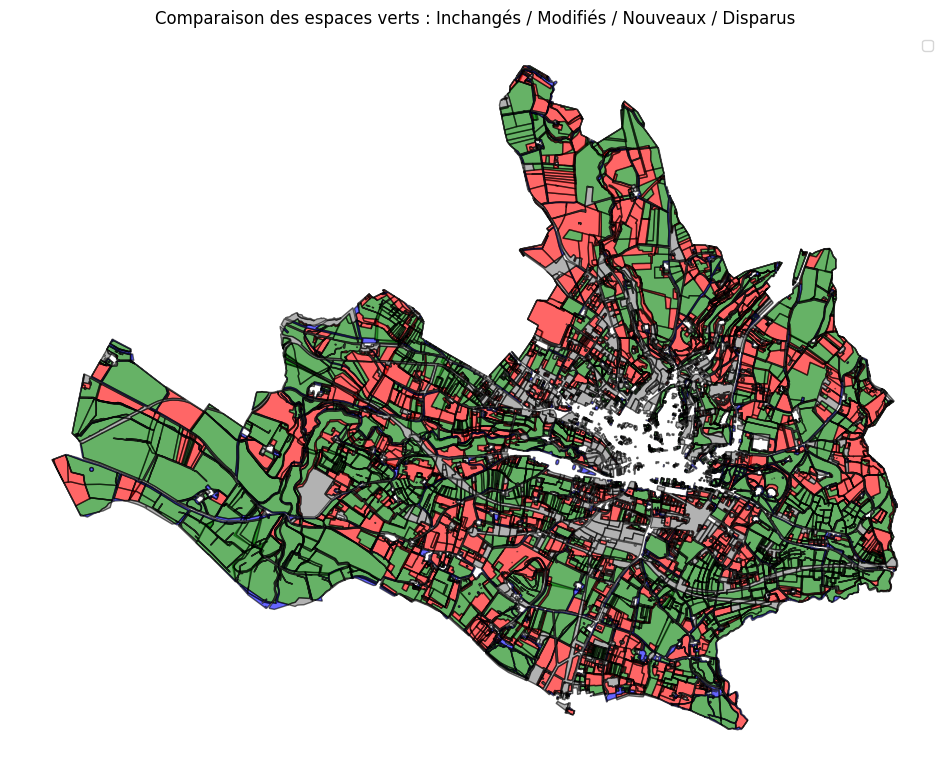

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 1. Charger les deux fichiers GeoJSON
gdf_old = gpd.read_file("Berney_espaces_verts_macro.geojson")
gdf_new = gpd.read_file("espaces_verts_macro.geojson")

# 2. Nettoyer et buffer pour éviter erreurs topologiques
gdf_old['geometry'] = gdf_old.geometry.buffer(0)
gdf_new['geometry'] = gdf_new.geometry.buffer(0)

# 3. Ajouter un identifiant unique
gdf_old = gdf_old.reset_index().rename(columns={'index': 'id_old'})
gdf_new = gdf_new.reset_index().rename(columns={'index': 'id_new'})

# 4. Harmoniser le système de coordonnées
if gdf_old.crs != gdf_new.crs:
    gdf_new = gdf_new.to_crs(gdf_old.crs)

# 5. Calcul des intersections avec découpe
inter = gpd.overlay(gdf_old, gdf_new, how='intersection')

# 6. Ajouter les champs de macro_ev et surfaces d'origine
inter = inter.merge(
    gdf_old[['id_old', 'macro_ev', 'area_m2']],
    on='id_old', how='left'
).rename(columns={'macro_ev': 'macro_ev_old', 'area_m2': 'area_old'})

inter = inter.merge(
    gdf_new[['id_new', 'macro_ev', 'area_m2']],
    on='id_new', how='left'
).rename(columns={'macro_ev': 'macro_ev_new', 'area_m2': 'area_new'})

# 7. Calculer la surface d'intersection
inter['area_inter'] = inter.geometry.area
inter['pct_old'] = inter['area_inter'] / inter['area_old']
inter['pct_new'] = inter['area_inter'] / inter['area_new']

# 8. Ajouter une colonne "changement"
inter["changement"] = inter.apply(
    lambda row: "inchangé" if row["macro_ev_old"] == row["macro_ev_new"] else "modifié",
    axis=1
)

# 9. Détecter les zones "disparues" et "nouvelles"
disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
disparus["changement"] = "disparu"

nouveaux = gpd.overlay(gdf_new, gdf_old, how='difference')
nouveaux["changement"] = "nouveau"

# 10. Fusion finale
gdf_final = pd.concat([inter, disparus, nouveaux], ignore_index=True)
gdf_final = gpd.GeoDataFrame(gdf_final, geometry='geometry', crs=gdf_old.crs)

# 11. Sauvegarde finale
gdf_final.to_file("evolution_Berney_Renove.geojson", driver='GeoJSON')

# 12. Affichage
fig, ax = plt.subplots(figsize=(12, 12))

colors = {
    "inchangé": "green",
    "modifié": "red",
    "nouveau": "blue",
    "disparu": "gray"
}

# On trace chaque catégorie séparément
for cat, color in colors.items():
    subset = gdf_final[gdf_final["changement"] == cat]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='black', alpha=0.6, label=cat.capitalize())
    else:
        print(f"Aucune zone '{cat}' à afficher.")

plt.legend()
plt.title("Comparaison des espaces verts : Inchangés / Modifiés / Nouveaux / Disparus")
plt.axis('off')
plt.show()


# Analyse evolution entre rénové et 2024

/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/351262414.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  inter['area_inter'] = inter.geometry.area
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/351262414.py:47: UserWarning: `keep_geom_type=True` in overlay resulted in 101 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_15318/351262414.py:50: UserWarning: `keep_geom_type=True` in overlay resulted in 321 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  nouveaux = gpd.overlay(gdf_new, gdf_old, how='difference')
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykerne

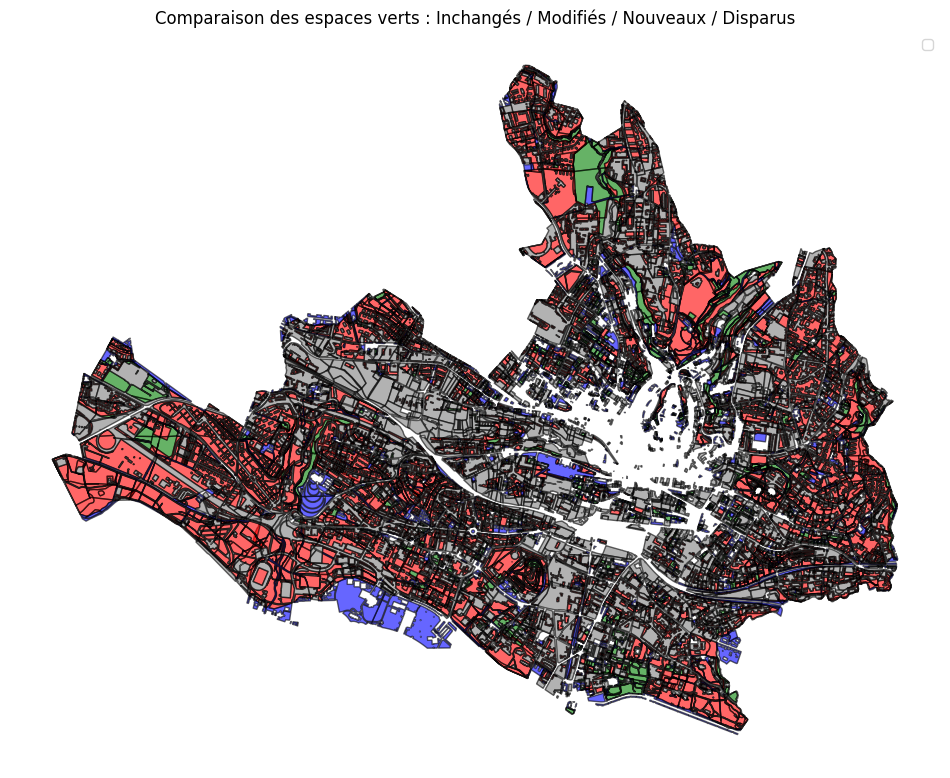

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 1. Charger les deux fichiers GeoJSON
gdf_new = gpd.read_file("2024_espaces_verts_macro.geojson") 
gdf_old = gpd.read_file("espaces_verts_macro.geojson")

# 2. Nettoyer et buffer pour éviter erreurs topologiques
gdf_old['geometry'] = gdf_old.geometry.buffer(0)
gdf_new['geometry'] = gdf_new.geometry.buffer(0)

# 3. Ajouter un identifiant unique
gdf_old = gdf_old.reset_index().rename(columns={'index': 'id_old'})
gdf_new = gdf_new.reset_index().rename(columns={'index': 'id_new'})

# 4. Harmoniser le système de coordonnées
if gdf_old.crs != gdf_new.crs:
    gdf_new = gdf_new.to_crs(gdf_old.crs)

# 5. Calcul des intersections avec découpe
inter = gpd.overlay(gdf_old, gdf_new, how='intersection')

# 6. Ajouter les champs de macro_ev et surfaces d'origine
inter = inter.merge(
    gdf_old[['id_old', 'macro_ev', 'area_m2']],
    on='id_old', how='left'
).rename(columns={'macro_ev': 'macro_ev_old', 'area_m2': 'area_old'})

inter = inter.merge(
    gdf_new[['id_new', 'macro_ev', 'area_m2']],
    on='id_new', how='left'
).rename(columns={'macro_ev': 'macro_ev_new', 'area_m2': 'area_new'})

# 7. Calculer la surface d'intersection
inter['area_inter'] = inter.geometry.area
inter['pct_old'] = inter['area_inter'] / inter['area_old']
inter['pct_new'] = inter['area_inter'] / inter['area_new']

# 8. Ajouter une colonne "changement"
inter["changement"] = inter.apply(
    lambda row: "inchangé" if row["macro_ev_old"] == row["macro_ev_new"] else "modifié",
    axis=1
)

# 9. Détecter les zones "disparues" et "nouvelles"
disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
disparus["changement"] = "disparu"

nouveaux = gpd.overlay(gdf_new, gdf_old, how='difference')
nouveaux["changement"] = "nouveau"

# 10. Fusion finale
gdf_final = pd.concat([inter, disparus, nouveaux], ignore_index=True)
gdf_final = gpd.GeoDataFrame(gdf_final, geometry='geometry', crs=gdf_old.crs)

# 11. Sauvegarde finale
gdf_final.to_file("evolution_Renove_Actuel.geojson", driver='GeoJSON')

# 12. Affichage
fig, ax = plt.subplots(figsize=(12, 12))

colors = {
    "inchangé": "green",
    "modifié": "red",
    "nouveau": "blue",
    "disparu": "gray"
}

# On trace chaque catégorie séparément
for cat, color in colors.items():
    subset = gdf_final[gdf_final["changement"] == cat]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='black', alpha=0.6, label=cat.capitalize())
    else:
        print(f"Aucune zone '{cat}' à afficher.")

plt.legend()
plt.title("Comparaison des espaces verts : Inchangés / Modifiés / Nouveaux / Disparus")
plt.axis('off')
plt.show()


# Analyse evolution entre Berney et 2024

Skipping field own_col_de: unsupported OGR type: 5
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_13070/2032776223.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  inter['area_inter'] = inter.geometry.area
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_13070/2032776223.py:47: UserWarning: `keep_geom_type=True` in overlay resulted in 65 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_13070/2032776223.py:50: UserWarning: `keep_geom_type=True` in overlay resulted in 306 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  nouveaux = gpd.overlay(gdf_new, gdf_old, how='difference')
/var

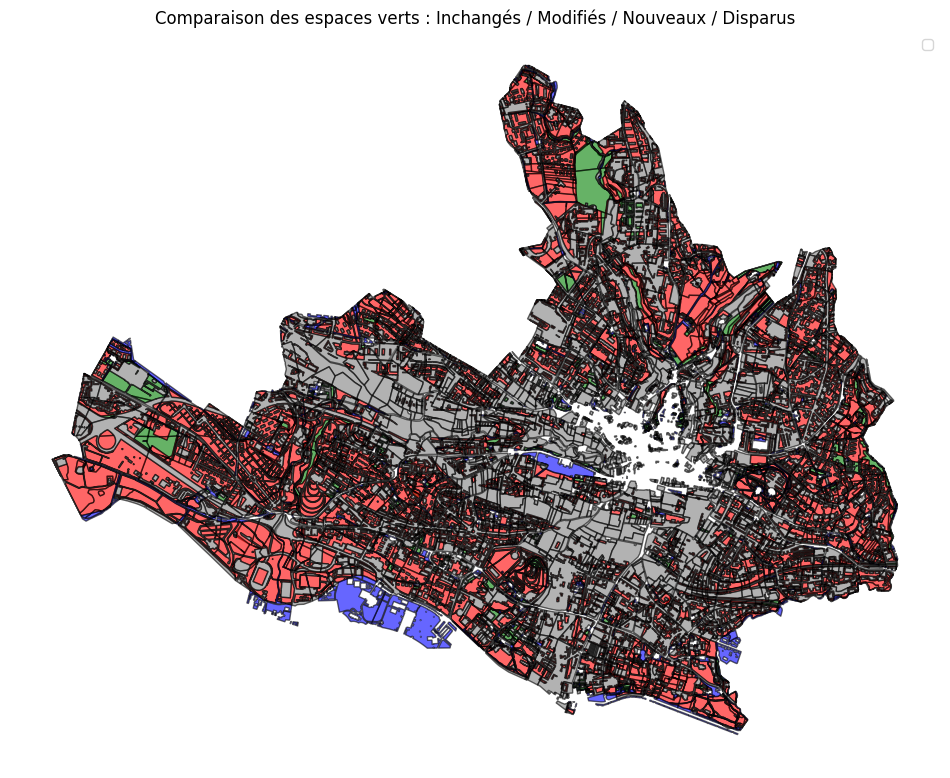

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 1. Charger les deux fichiers GeoJSON
gdf_old = gpd.read_file("Berney_espaces_verts_macro.geojson")
gdf_new = gpd.read_file("2024_espaces_verts_macro.geojson")

# 2. Nettoyer et buffer pour éviter erreurs topologiques
gdf_old['geometry'] = gdf_old.geometry.buffer(0)
gdf_new['geometry'] = gdf_new.geometry.buffer(0)

# 3. Ajouter un identifiant unique
gdf_old = gdf_old.reset_index().rename(columns={'index': 'id_old'})
gdf_new = gdf_new.reset_index().rename(columns={'index': 'id_new'})

# 4. Harmoniser le système de coordonnées
if gdf_old.crs != gdf_new.crs:
    gdf_new = gdf_new.to_crs(gdf_old.crs)

# 5. Calcul des intersections avec découpe
inter = gpd.overlay(gdf_old, gdf_new, how='intersection')

# 6. Ajouter les champs de macro_ev et surfaces d'origine
inter = inter.merge(
    gdf_old[['id_old', 'macro_ev', 'area_m2']],
    on='id_old', how='left'
).rename(columns={'macro_ev': 'macro_ev_old', 'area_m2': 'area_old'})

inter = inter.merge(
    gdf_new[['id_new', 'macro_ev', 'area_m2']],
    on='id_new', how='left'
).rename(columns={'macro_ev': 'macro_ev_new', 'area_m2': 'area_new'})

# 7. Calculer la surface d'intersection
inter['area_inter'] = inter.geometry.area
inter['pct_old'] = inter['area_inter'] / inter['area_old']
inter['pct_new'] = inter['area_inter'] / inter['area_new']

# 8. Ajouter une colonne "changement"
inter["changement"] = inter.apply(
    lambda row: "inchangé" if row["macro_ev_old"] == row["macro_ev_new"] else "modifié",
    axis=1
)

# 9. Détecter les zones "disparues" et "nouvelles"
disparus = gpd.overlay(gdf_old, gdf_new, how='difference')
disparus["changement"] = "disparu"

nouveaux = gpd.overlay(gdf_new, gdf_old, how='difference')
nouveaux["changement"] = "nouveau"

# 10. Fusion finale
gdf_final = pd.concat([inter, disparus, nouveaux], ignore_index=True)
gdf_final = gpd.GeoDataFrame(gdf_final, geometry='geometry', crs=gdf_old.crs)

# 11. Sauvegarde finale
gdf_final.to_file("evolution_Berney_2024.geojson", driver='GeoJSON')

# 12. Affichage
fig, ax = plt.subplots(figsize=(12, 12))

colors = {
    "inchangé": "green",
    "modifié": "red",
    "nouveau": "blue",
    "disparu": "gray"
}

# On trace chaque catégorie séparément
for cat, color in colors.items():
    subset = gdf_final[gdf_final["changement"] == cat]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='black', alpha=0.6, label=cat.capitalize())
    else:
        print(f"Aucune zone '{cat}' à afficher.")

plt.legend()
plt.title("Comparaison des espaces verts : Inchangés / Modifiés / Nouveaux / Disparus")
plt.axis('off')
plt.show()
